In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib


In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Número de variables: ", df.shape[1])
print("Número de registros: ", df.shape[0])

# Mostrar información sobre cada variable
print(df.info())

# Describir estadísticas básicas de las variables numéricas
print(df.describe())

Número de variables:  12
Número de registros:  891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.

In [6]:
import seaborn as sns
sns.set_style('darkgrid')



In [7]:
survived = df['Survived']. value_counts(normalize=True)*100
print(survived)

0    61.616162
1    38.383838
Name: Survived, dtype: float64


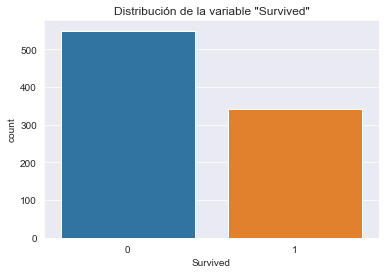

In [8]:
sns.countplot(data=df,x='Survived')
plt.title('Distribución de la variable "Survived"')
plt.show()

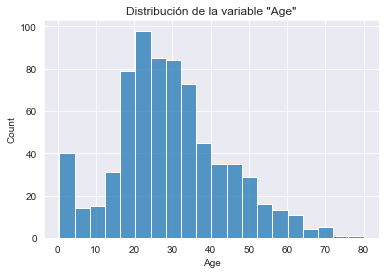

In [9]:
age =df['Age'].dropna()
sns.histplot(data=age, bins =20)
plt.title('Distribución de la variable "Age"')
plt.show()

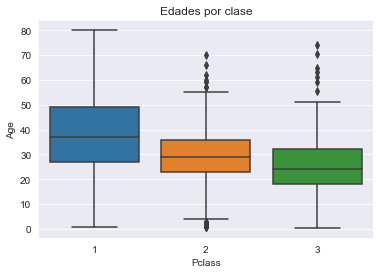

In [11]:
sns.boxplot(x="Pclass", y ="Age", data = df)
plt.title('Edades por clase')
plt.show()

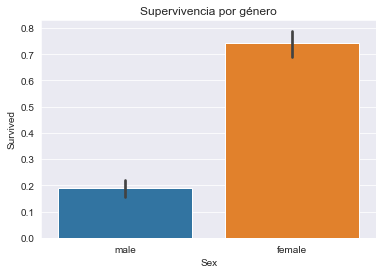

In [13]:
sns.barplot(x="Sex", y ="Survived",  data = df)
plt.title('Supervivencia por género')
plt.show()

C:\Users\saram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


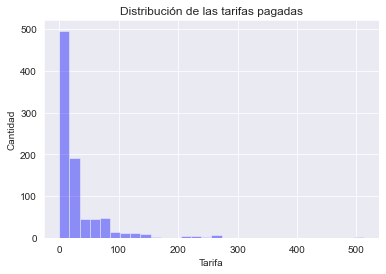

In [16]:
sns.distplot(df['Fare'], kde =False, color='b', bins =30)
plt.title('Distribución de las tarifas pagadas')
plt.xlabel('Tarifa')
plt.ylabel('Cantidad')
plt.show()

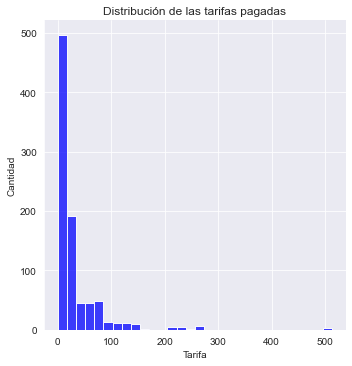

In [17]:
sns.displot(df['Fare'], kde =False, color='b', bins =30)
plt.title('Distribución de las tarifas pagadas')
plt.xlabel('Tarifa')
plt.ylabel('Cantidad')
plt.show()

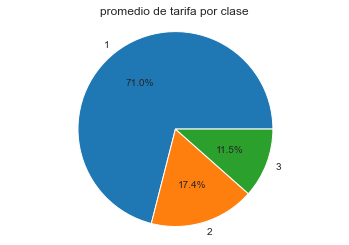

In [23]:
class_fares=df.groupby('Pclass')['Fare'].mean()
colors=['tab:blue', 'tab:orange', 'tab:green']
plt.pie(class_fares, labels=class_fares.index, colors = colors, autopct = '%1.1f%%')
plt.title('promedio de tarifa por clase')
plt.axis('equal')
plt.show()

In [24]:
survivors_by_sex=df.groupby('Sex')['Survived'].value_counts()

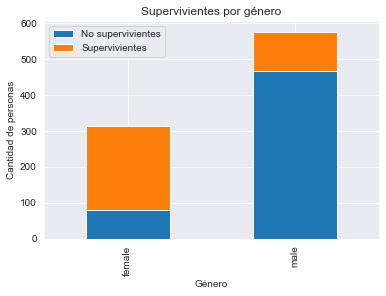

In [25]:
survivors_by_sex.unstack().plot(kind='bar', stacked=True)
plt.title('Supervivientes por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.legend(('No supervivientes', 'Supervivientes'))
plt.show()

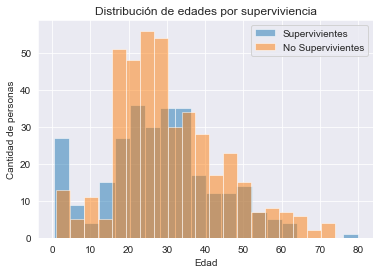

In [26]:
survivors=df[df['Survived']==1]
non_survivors=df[df['Survived']==0]
plt.hist(survivors['Age'].dropna(), bins=20, alpha=0.5, label ='Supervivientes')
plt.hist(non_survivors['Age'].dropna(), bins=20, alpha=0.5, label ='No Supervivientes')
plt.title('Distribución de edades por superviviencia')
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.legend()
plt.show()